In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D


In [2]:
df_train = pd.read_csv("C:/Users/janhv/OneDrive/Desktop/CSIS Sem4/CSIS 4260 Spl Topics/SignDataset/sign_mnist_train/sign_mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
df_test = pd.read_csv("C:/Users/janhv/OneDrive/Desktop/CSIS Sem4/CSIS 4260 Spl Topics/SignDataset/sign_mnist_test/sign_mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [6]:
train_label = df_train["label"]
test_label = df_test["label"]

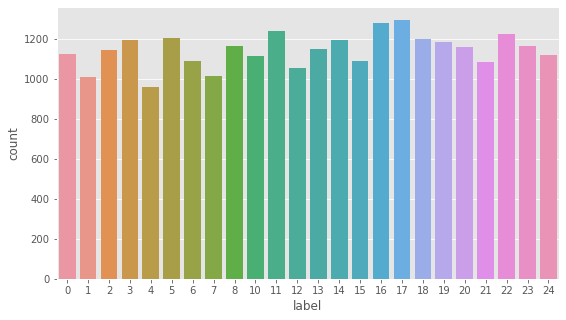

In [7]:
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= df_train['label'],data = df_train)
plt.show()

In [8]:
df_train.drop("label",axis=1,inplace=True)
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [9]:
df_test.drop("label",axis=1,inplace=True)
df_test.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180


In [10]:
x_train = df_train.values
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [11]:
x_train = x_train.reshape(-1,28,28,1)
x_test = df_test.values.reshape(-1,28,28,1)

In [12]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

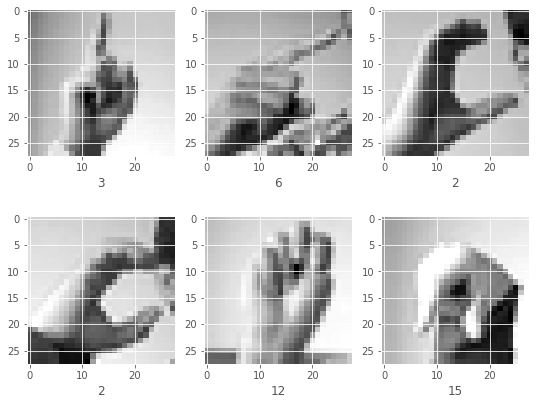

In [13]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()

In [14]:
train_datagen = ImageDataGenerator(rescale=(1./255),rotation_range = 30,
                                  width_shift_range = 0.2,height_shift_range =0.2,
                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))

In [15]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('sign_lan.h5',monitor ='val_acc',verbose=1,save_best_only=True,mode='max')
earlystop = EarlyStopping(monitor = 'val_acc',verbose=1,mode='max')


In [19]:
history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),
                              validation_data = val_datagen.flow(x_test,y_test),epochs=15,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
858/858 [==============================] - 44s 51ms/step - loss: 2.4227 - accuracy: 0.2403 - val_loss: 1.2658 - val_accuracy: 0.5768
Epoch 2/15
858/858 [==============================] - 47s 55ms/step - loss: 1.2278 - accuracy: 0.5864 - val_loss: 0.6283 - val_accuracy: 0.7743
Epoch 3/15
858/858 [==============================] - 54s 63ms/step - loss: 0.7736 - accuracy: 0.7354 - val_loss: 0.4567 - val_accuracy: 0.8402
Epoch 4/15
858/858 [==============================] - 53s 62ms/step - loss: 0.5386 - accuracy: 0.8170 - val_loss: 0.2980 - val_accuracy: 0.8972
Epoch 5/15
858/858 [==============================] - 56s 65ms/step - loss: 0.4206 - accuracy: 0.8578 - val_loss: 0.1448 - val_accuracy: 0.9498
Epoch 6/15
858/858 [==============================] - 51s 60ms/step - loss: 0.3274 - accuracy: 0.8893 - val_loss: 0.1657 - val_accuracy: 0.9391
Epoch 7/15
858/858 [==============================] - 51s 59

In [20]:
import warnings
warnings.filterwarnings("ignore")
loss,acc = model.evaluate_generator(val_datagen.flow(x_test,y_test))
print(f"Accuracy: {acc*100}")
print(f"Loss: {loss}")

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy: 98.54991436004639
Loss: 0.03904684633016586


In [21]:
x_test = x_test/255.
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
y_te = np.argmax(y_test,axis=1)
y_te

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te,y_pred)

0.9854991634132738

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.97      0.99       432
           2       1.00      1.00      1.00       310
           3       1.00      0.97      0.98       245
           4       1.00      1.00      1.00       498
           5       0.93      1.00      0.96       247
           6       0.90      1.00      0.95       348
           7       1.00      0.89      0.94       436
           8       1.00      1.00      1.00       288
           9       0.95      1.00      0.98       331
          10       1.00      1.00      1.00       209
          11       0.99      1.00      0.99       394
          12       1.00      0.98      0.99       291
          13       1.00      1.00      1.00       246
          14       1.00      0.97      0.98       347
          15       1.00      1.00      1.00       164
          16       0.95      0.99      0.97       144
          17       1.00    

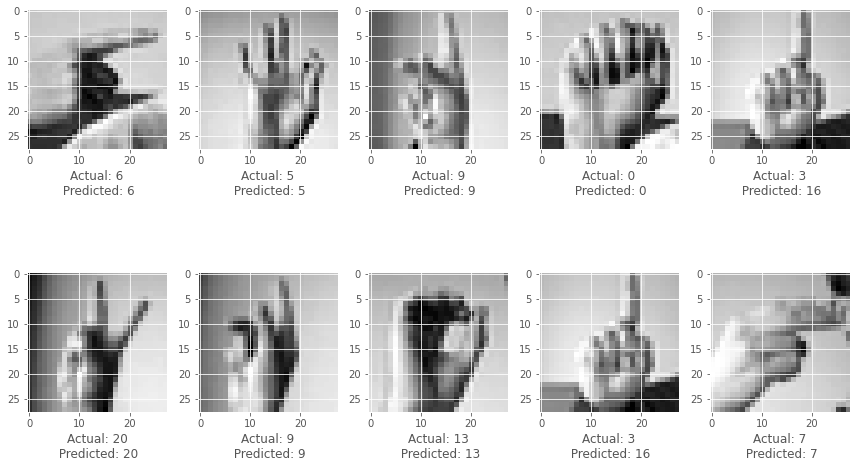

In [25]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xlabel(f"Actual: {y_te[i]}\n Predicted: {y_pred[i]}")
    
plt.tight_layout()
plt.show()